In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
image_as_BGR = cv2.imread("C:\\Jupyter\\pdi\\imagenes\\random_scene.jpg")
image_as_GRAY = cv2.cvtColor(image_as_BGR, cv2.COLOR_BGR2GRAY)

In [9]:
image_as_GRAY.dtype

dtype('uint8')

### Uso de Matplotlib

In [10]:
histograma = cv2.calcHist([image_as_BGR], [0], None, [256], [0, 256]) # los parámetros de la función son: (imagen, canal, tamaño, rango). El tamaño es el número de bins, y rango: son los valores de 
# píxeles que toma la imagen
print("El histograma es: \n{}".format(histograma))
print("Su shape es: \n{}".format(histograma.shape))

El histograma es: 
[[  700.]
 [  322.]
 [  506.]
 [  743.]
 [ 1076.]
 [ 1374.]
 [ 1912.]
 [ 2465.]
 [ 4009.]
 [ 9622.]
 [13592.]
 [15358.]
 [18156.]
 [29653.]
 [49944.]
 [49074.]
 [43767.]
 [44477.]
 [47709.]
 [53300.]
 [57811.]
 [60769.]
 [58234.]
 [58230.]
 [59411.]
 [51728.]
 [63103.]
 [60858.]
 [62573.]
 [66737.]
 [56211.]
 [52025.]
 [48932.]
 [42235.]
 [44745.]
 [42134.]
 [38851.]
 [36355.]
 [30563.]
 [34247.]
 [35655.]
 [32475.]
 [39439.]
 [31986.]
 [29729.]
 [27574.]
 [25807.]
 [18617.]
 [17196.]
 [15247.]
 [12127.]
 [11556.]
 [11244.]
 [10247.]
 [10117.]
 [ 9058.]
 [ 8721.]
 [ 8587.]
 [ 8255.]
 [ 8059.]
 [ 7652.]
 [ 7618.]
 [ 7841.]
 [ 7917.]
 [ 8504.]
 [ 8484.]
 [ 7967.]
 [ 7793.]
 [ 7559.]
 [ 7249.]
 [ 7317.]
 [ 7612.]
 [ 7289.]
 [ 7536.]
 [ 7356.]
 [ 7097.]
 [ 7194.]
 [ 7016.]
 [ 6570.]
 [ 6905.]
 [ 6881.]
 [ 6616.]
 [ 6709.]
 [ 6732.]
 [ 6658.]
 [ 6584.]
 [ 6725.]
 [ 6810.]
 [ 6670.]
 [ 6762.]
 [ 6444.]
 [ 6526.]
 [ 6443.]
 [ 6202.]
 [ 6251.]
 [ 6221.]
 [ 6169.]
 [ 6004.]
 

In [7]:
type(histograma)

numpy.ndarray

## Histograma en Numpy

In [14]:
#help(np.histogram)
histograma, bins = np.histogram(image_as_GRAY.ravel(), 256, [0, 255]) # los parámetros de la función son: (imagen, canal, tamaño, rango). El tamaño es el número de bins, y rango: son los valores de 
# píxeles que toma la imagen
print("El histograma es: \n{}".format(histograma))
print("Su shape es: \n{}".format(histograma.shape))

El histograma es: 
[   56    65   105   218   442   761  2244  8695 17281 34931 55737 51636
 47544 52000 58444 62254 81703 73204 72532 82504 68080 70336 76301 63736
 59413 62059 54402 52765 54353 48955 43846 47810 41433 39502 36819 24049
 21430 19625 15797 14699 14213 13434 12880 11713 11225 11231 11243 10165
 10198  9828  9151  8725  8907  8793  8884  9116  8341  7963  7865  7434
  7221  7461  7257  7096  6907  6634  6468  6439  6152  6223  6123  5989
  6133  6340  5904  6156  6034  6044  5712  5761  5905  5927  5632  5687
  5629  5715  5572  5468  5585  5697  5850  5778  5779  5810  5920  5912
  5849  5876  5953  5876  5880  5636  5630  5641  5428  5319  5329  5244
  5171  5272  5129  4970  5062  5022  5134  4977  4943  5031  5015  4878
  4927  4816  4944  4993  4824  4872  4857  4794  4765  4810  4731  4665
  4596  4552  4409  4339  4262  4094  4099  3989  3950  4000  3869  3890
  3792  3716  3613  3691  3515  3641  3489  3486  3445  3462  3283  3254
  3392  3147  3108  3236  3100  

### Uso de Matplotlib

In [21]:
# los parámetros de la función son: (imagen, canal, tamaño, rango). El tamaño es el número de bins, y rango: son los valores de 
#en este caso es el histograma del canal 0, 1 y 2 -> [0], [1], [2]
histograma_canal_azul = cv2.calcHist([image_as_BGR], [0], None, [256], [0, 256])
histograma_canal_verde = cv2.calcHist([image_as_BGR], [1], None, [256], [0, 256])
histograma_canal_rojo = cv2.calcHist([image_as_BGR], [2], None, [256], [0, 256])

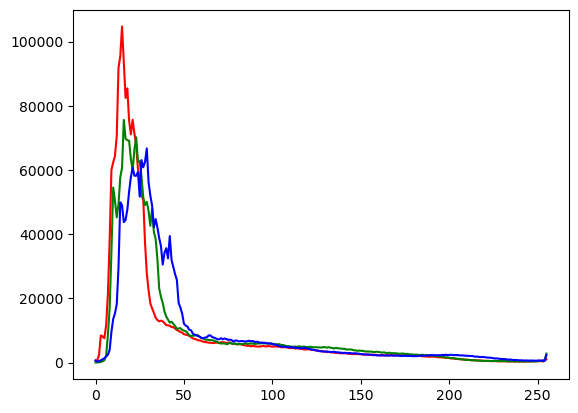

In [22]:
plt.plot(histograma_canal_rojo, color = 'r')
plt.plot(histograma_canal_verde, color = 'g')
plt.plot(histograma_canal_azul, color = 'b')
plt.show()

### Aplicando una máscara

(1280, 1920)


<function matplotlib.pyplot.show(close=None, block=None)>

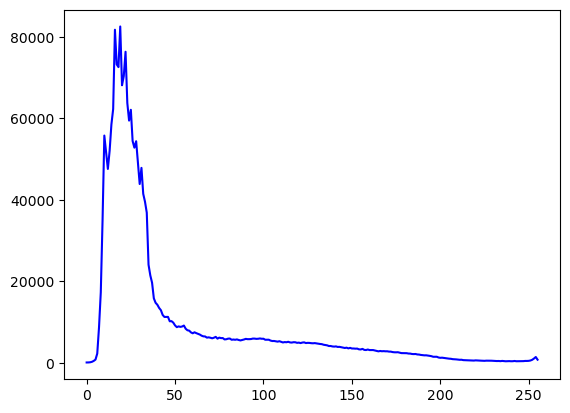

In [4]:
#Histograma de la imagen en escala de grises
print(image_as_GRAY.shape)
histograma_for_GRAY = cv2.calcHist([image_as_GRAY], [0], None, [256], [0,256]) # es el histograma en escala de grises, por eso la única banda o canal es el [0]
plt.plot(histograma_for_GRAY, color = 'b')
plt.show

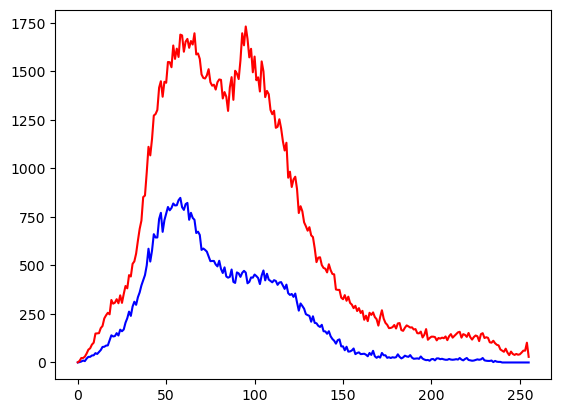

In [13]:
mask = np.zeros(image_as_GRAY.shape, np.uint8)
mask[100:300, 100:400] = 255 #toda esta región va a ser ahora blanco

## ver la imagen con la máscara:
image_as_GRAY_mask = cv2.bitwise_and(image_as_GRAY, image_as_GRAY, mask = mask)

# Obteniendo el histograma
histograma_for_GRAY = cv2.calcHist([image_as_GRAY], [0], mask, [256], [0,256])
histograma = cv2.calcHist([image_as_GRAY], [0], None, [256], [0,256])
cv2.imshow('Imagen en gris', image_as_GRAY)
cv2.imshow('Imagen en gris_con_ mascara', image_as_GRAY_mask)
cv2.imshow('Máscara', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.plot(histograma_for_GRAY, color = "b")
plt.plot(histograma, color = "r")
plt.show()